In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,auc,roc_curve
import sklearn.svm as svm
from sklearn.multiclass import OneVsOneClassifier
from scipy import interp

In [2]:
data=pd.read_csv("C:/Users/cuiyao/毕业设计SVM/SVM_GSE35809.csv")
X=data.iloc[:,1:12986]  #  分割样本特征
Y=data.iloc[:,12986:12987]  #  分割样本标签
y=np.ravel(Y)  


In [ ]:
# ##  设计模型----线性核
# random_state = np.random.RandomState(0)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)  #  分割训练集和测试集，测试集占0.2
# model=svm.SVC(kernel="linear",probability=True,decision_function_shape="ovo")  #  定义模型，线性核函数，ovo分类方法

In [59]:

def test_C():
    result={"C":[],
           "acu_linear_test":[],
           "acu_poly_test":[],
           "acu_rbf_test":[]}
    for c in range(1,101,9):
        random_state = np.random.RandomState(c)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=c)
        model=svm.SVC(kernel="linear",probability=True,decision_function_shape="ovo")
        acu_test=model.fit(x_train,y_train).score(x_test,y_test)
        result["C"].append(c)
        result["acu_linear_test"].append(acu_test)
    for c in range(1,101,9):
        random_state = np.random.RandomState(c)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=c)
        model=svm.SVC(kernel="poly",probability=True,decision_function_shape="ovo")
        acu_test=model.fit(x_train,y_train).score(x_test,y_test)
        result["acu_poly_test"].append(acu_test)
    for c in range(1,101,9):
        random_state = np.random.RandomState(c+1)
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=c+1)
        model=svm.SVC(kernel="rbf",probability=True,decision_function_shape="ovo")
        acu_test=model.fit(x_train,y_train).score(x_test,y_test)
        result["acu_rbf_test"].append(acu_test)
    result=pd.DataFrame(result)
    return result
a=test_C()

In [61]:
a["acu_poly_test"]

0     0.857143
1     1.000000
2     1.000000
3     0.952381
4     0.904762
5     0.904762
6     0.952381
7     0.952381
8     0.952381
9     0.952381
10    0.952381
11    1.000000
Name: acu_poly_test, dtype: float64

Text(0.5, 0, 'C')

Text(0.5, 1.0, 'Accuracy under different punishment parameters')

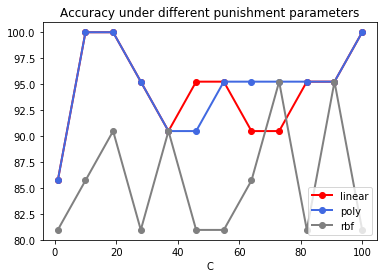

In [77]:
plt.xlabel("C")
plt.plot(a["C"],100*a["acu_linear_test"],color='red',marker='o',linewidth=2.0)
plt.plot(a["C"],100*a["acu_poly_test"],color='royalblue',marker='o',linewidth=2.0)
plt.plot(a["C"],100*a["acu_rbf_test"],color='grey',marker='o',linewidth=2.0)
plt.legend(labels=('linear','poly','rbf'),loc = 'lower right')
plt.title("Accuracy under different punishment parameters")
plt.savefig('C.svg',dpi=600)
plt.show()

In [ ]:
# ##  设计模型----多项式核
# random_state = np.random.RandomState(0)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)  #  分割训练集和测试集，测试集占0.2
# model=svm.SVC(kernel="poly",degree=3,probability=True,decision_function_shape="ovo")

In [38]:
##  设计模型----RBF核
random_state = np.random.RandomState(0)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)  #  分割训练集和测试集，测试集占0.2
result={"C":[],"linear_acu_test":[],
            "poly_acu_test":[],
            "rbf_acu_test":[]}
for c in range(1,20,1):
    model=svm.SVC(kernel="rbf",C=c/2,gamma='auto',probability=True,decision_function_shape="ovo")
    acu_test=model.fit(x_train,y_train).score(x_test,y_test)
    result["C"].append(c/2)
    result["rbf_acu_test"].append(acu_test)
random_state = np.random.RandomState(1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
for c in range(1,20,1):
    model=svm.SVC(kernel="linear",C=c/2,probability=True,decision_function_shape="ovo")
    acu_test=model.fit(x_train,y_train).score(x_test,y_test)
    result["linear_acu_test"].append(acu_test)
random_state = np.random.RandomState(5)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)
for c in range(1,20,1):
    model=svm.SVC(kernel="poly",C=c/2,degree=3,probability=True,decision_function_shape="ovo")
    acu_test=model.fit(x_train,y_train).score(x_test,y_test)
    result["poly_acu_test"].append(acu_test)

In [39]:
pd.DataFrame(result)

,C,poly_acu_test,rbf_acu_test
0,0.5,1.0,0.857143
1,1.0,1.0,0.892857
2,1.5,1.0,0.892857
3,2.0,1.0,0.892857
4,2.5,1.0,0.892857
5,3.0,1.0,0.892857
6,3.5,1.0,0.892857
7,4.0,1.0,0.892857
8,4.5,1.0,0.892857
9,5.0,1.0,0.892857


In [14]:
##  训练模型
model.fit(x_train,y_train) #  使用训练集训练
acu_test=model.score(x_test,y_test)  #  测试集分类准确率
print("预测准确率：",acu_test)  # 准确率
y_pred=model.predict(x_test)  #  预测的标签
# print("预测的标签：",y_pred)
# print("真实的标签：",y_test)
y_score=model.decision_function(x_test)  #  得到每对分类器的输出
# print("测试样本在每一类的得分：",y_score)
proba=model.predict_proba(x_test)  #  属于每一类的概率
# print("测试样本属于每一类的概率：",proba)

SVC(C=3, decision_function_shape='ovo', gamma='auto', probability=True)

预测准确率： 0.8571428571428571
预测的标签： [2 0 2 2 0 2 2 1 2 0 0 1 2 1 0 2 2 2 2 1 2]
真实的标签： [2 0 2 2 0 2 2 1 2 1 0 1 2 1 1 2 2 2 2 2 2]


In [10]:
#  优化SVC的惩罚系数C-----线性核

# random_state = np.random.RandomState(0)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
def svc_model(model):
    model.fit(x_train,y_train)
    acu_test=model.score(x_test,y_test)
    return acu_test

def test_c():
    result={"C":[],"linear_acu_test":[],
            "poly_acu_test":[],
            "rbf_acu_test":[]}
    for c in range(1,21,1):
        model=svm.SVC(kernel="linear",probability=True,C=c,decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["C"].append(c)
        result["linear_acu_test"].append(acu_test)
    for c in range(1,21,1):
        model=svm.SVC(kernel="rbf",probability=True,C=c,gamma='auto',decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["rbf_acu_test"].append(acu_test)
    for c in range(1,21,1):
        model=svm.SVC(kernel="poly",probability=True,C=c,degree=3,decision_function_shape="ovo")
        acu_test=svc_model(model)
        result["poly_acu_test"].append(acu_test)
    df=pd.DataFrame(result)
    return df
test_c()

,C,linear_acu_test,poly_acu_test,rbf_acu_test
0,1,1.0,1.0,1.0
1,2,1.0,1.0,1.0
2,3,1.0,1.0,1.0
3,4,1.0,1.0,1.0
4,5,1.0,1.0,1.0
5,6,1.0,1.0,1.0
6,7,1.0,1.0,1.0
7,8,1.0,1.0,1.0
8,9,1.0,1.0,1.0
9,10,1.0,1.0,1.0
